Use of important library is needed for our dataset

In [ ]:
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

Unloading the dataset into the dataframe "df"

In [ ]:
df = pd.read_excel('/content/CustomerBehave.xlsx')

Exploring the dataset here

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


shape of the dataset

In [ ]:
df.shape

(3900, 18)

Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Checking the types of data present in our dataframe

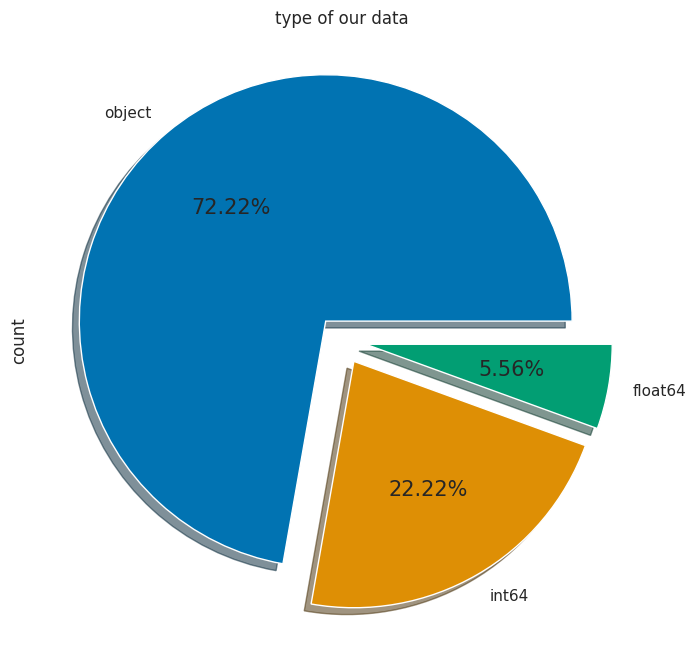

In [ ]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

Check the numerical values and categorical values

In [ ]:
# show the numerical values

num_columns = [f for f in df.columns if df.dtypes[f] != 'object']
num_columns

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [ ]:
# checking the categorical values
cat_columns = [f for f in df.columns if df.dtypes[f] == 'object']
cat_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

Gathering general, average, minimum, maximum of dataset of the features

In [ ]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Checking the missing values in our dataset

In [ ]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
Customer ID,0,0.0
Age,0,0.0
Gender,0,0.0
Item Purchased,0,0.0
Category,0,0.0
Purchase Amount (USD),0,0.0
Location,0,0.0
Size,0,0.0
Color,0,0.0
Season,0,0.0


Exploratory Data Analysis: Starting the exploartion of features

In [ ]:
#for age
df['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [ ]:
#for gender
df['Gender'].value_counts()

,count
Gender,
Male,2652
Female,1248


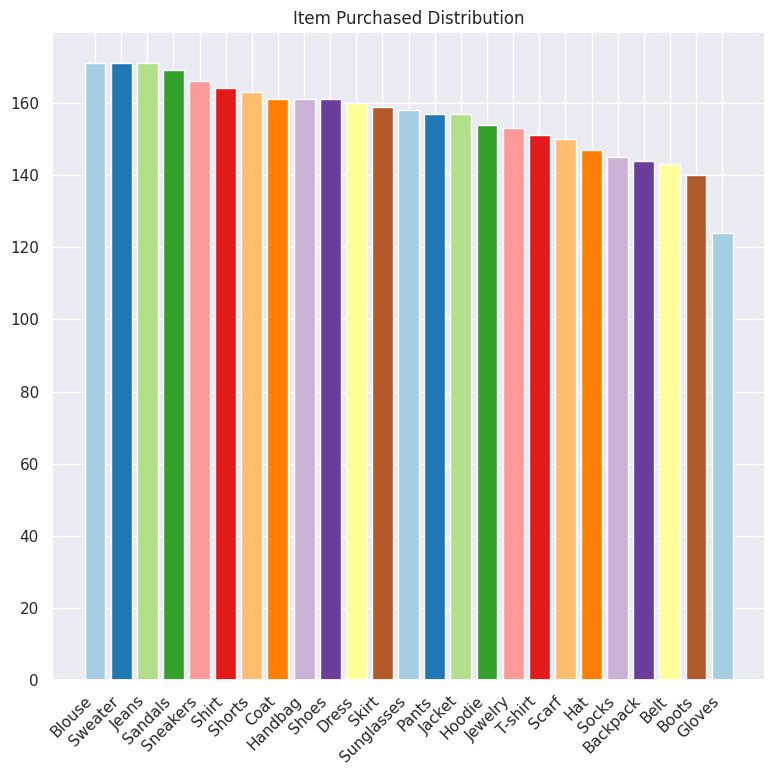

In [ ]:
# Item BOught Description
# Create a bar chart
plt.figure(figsize=(8, 8))
plt.bar(df['Item Purchased'].unique(), df['Item Purchased'].value_counts(), color=plt.cm.Paired.colors)
plt.title('Item Purchased Distribution')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#Grouping the purchase power of each gender
df.groupby("Gender")["Purchase Amount (USD)"].mean().sort_values(ascending=0)

,Purchase Amount (USD)
Gender,
Female,60.249199
Male,59.536199


In [ ]:
#For category in the dataframe
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [ ]:
#checking the location distribution of dataframe
df['Location'].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


In [ ]:
#check the size distribution
df['Size'].value_counts()

,count
Size,
M,1755
L,1053
S,663
XL,429


In [ ]:
#check the color variation
df['Color'].value_counts()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


In [ ]:
#check the season variation
df['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [ ]:
#check the review rating distribution
df['Review Rating'].value_counts()

,count
Review Rating,
3.4,182
4.0,181
4.6,174
4.2,171
2.9,170
4.9,166
3.9,163
3.0,162
2.6,159


In [ ]:
#check the subscription status distribution
df['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


In [ ]:
#check the shipping type distribution
df['Shipping Type'].value_counts()

,count
Shipping Type,
Free Shipping,675
Standard,654
Store Pickup,650
Next Day Air,648
Express,646
2-Day Shipping,627


In [ ]:
#check the discount applied distribution
df['Discount Applied'].value_counts()

,count
Discount Applied,
No,2223
Yes,1677


In [ ]:
#check the promo code distribution
df['Promo Code Used'].value_counts()

,count
Promo Code Used,
No,2223
Yes,1677


In [ ]:
#check the previous purchases distribution
df['Previous Purchases'].value_counts()

,count
Previous Purchases,
31,97
21,96
14,92
24,91
3,91
4,91
48,90
47,90
5,87


In [ ]:
#check the payment method distribution
df['Payment Method'].value_counts()

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


In [ ]:
#check the frequency of purchase distribution
df['Frequency of Purchases'].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


<Figure size 1000x500 with 0 Axes>

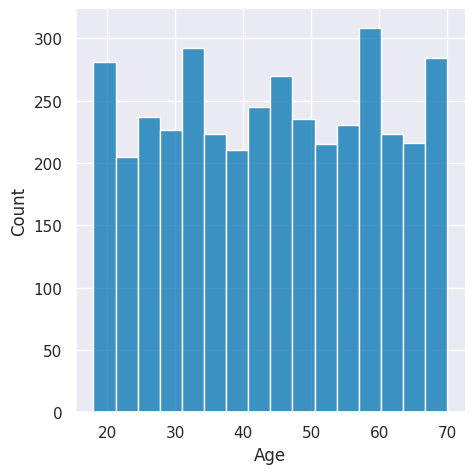

<Figure size 1000x500 with 0 Axes>

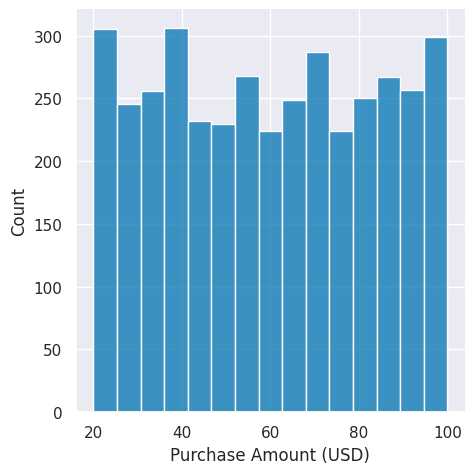

<Figure size 1000x500 with 0 Axes>

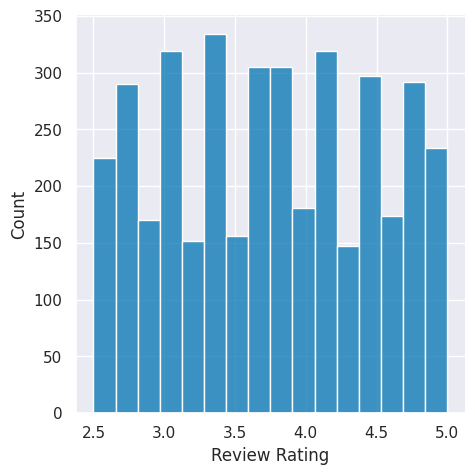

<Figure size 1000x500 with 0 Axes>

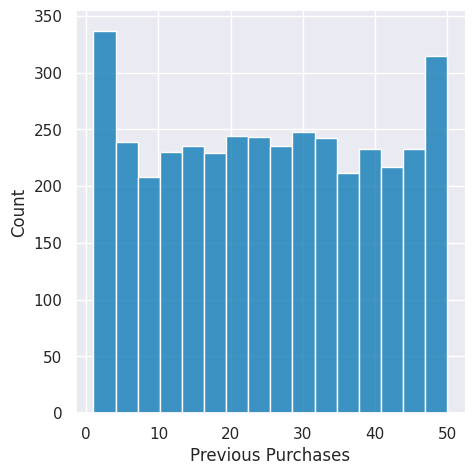

In [ ]:
#Plot distplot for numerical columns
cols = ['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.displot(df[col])
    plt.show()

<Figure size 1800x600 with 0 Axes>

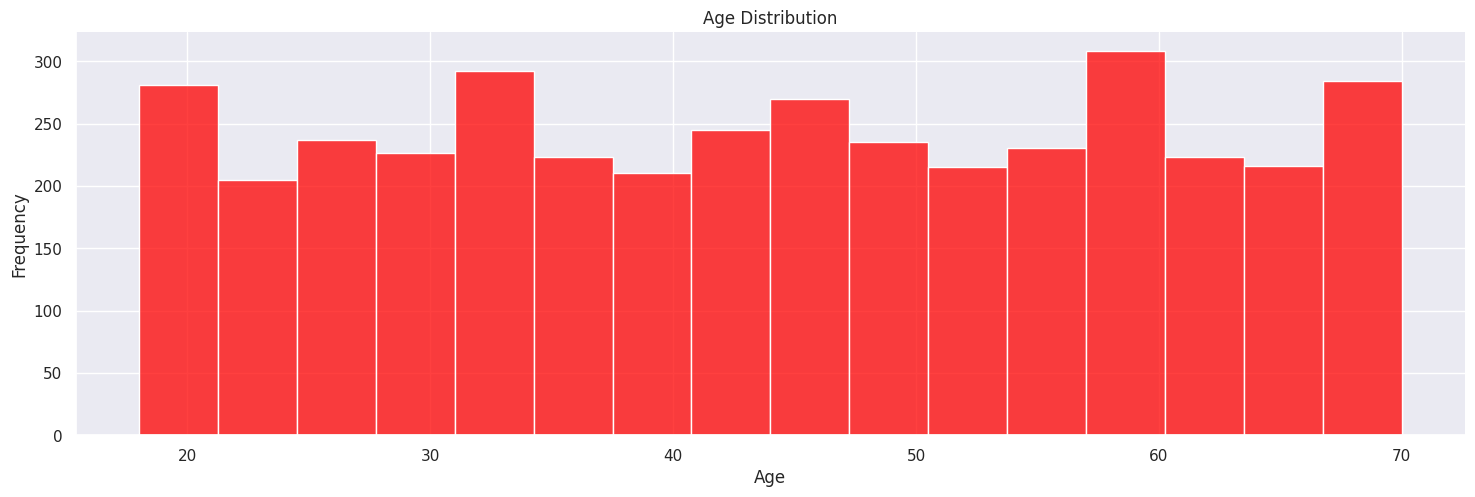

In [ ]:
#Age distribution
plt.figure(figsize=(18,6))

sns.displot(data=df,x='Age', kind='hist', color='red', aspect=3)  # aspect adjusts the width-to-height ratio
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64


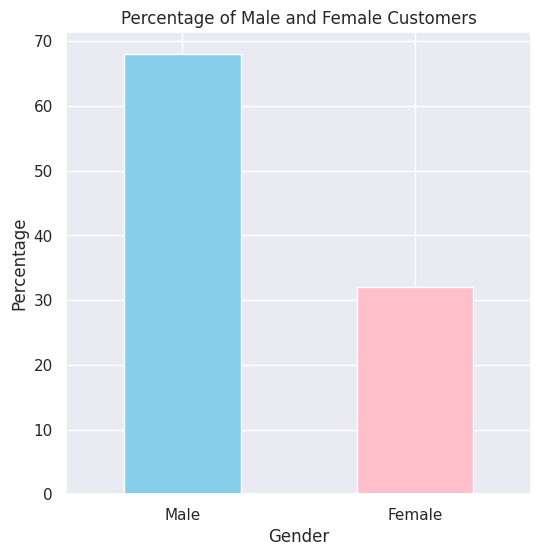

In [ ]:
# Calculate the percentage of male and female customers
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print(gender_counts)

# Create a bar plot to visualize the gender distribution
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Percentage of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

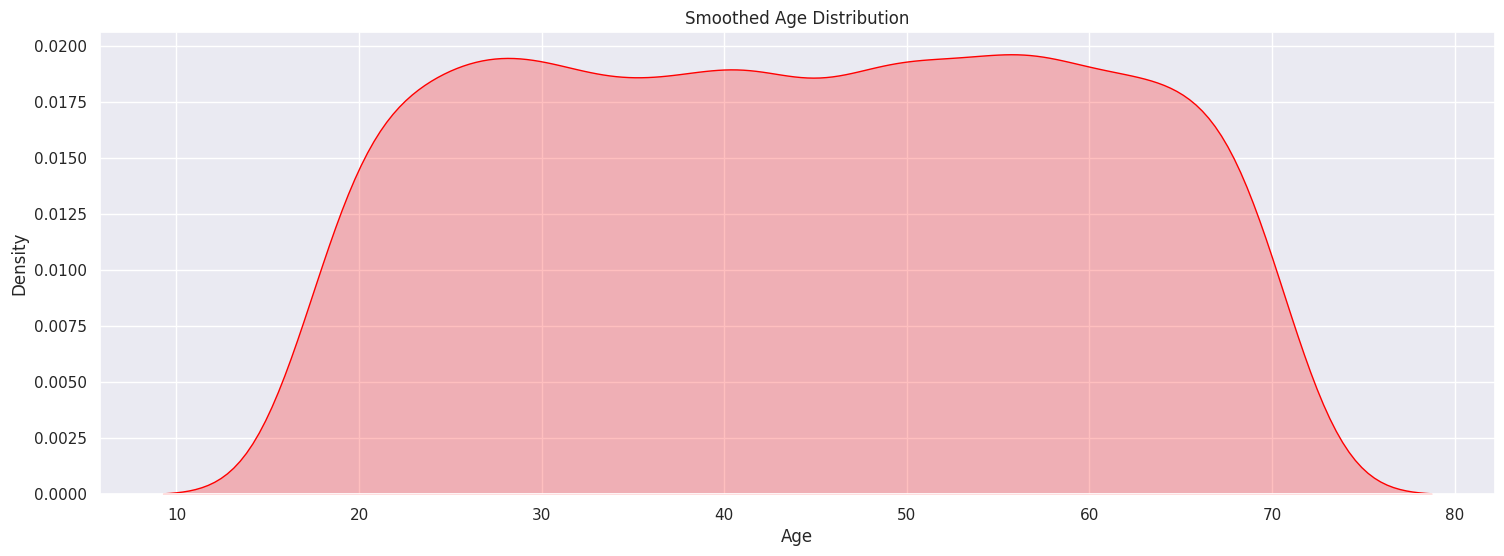

In [ ]:
# Example (visualization only):
plt.figure(figsize=(18,6))
sns.kdeplot(data=df, x='Age', color='red', fill=True) # KDE plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Smoothed Age Distribution')
plt.show()

<Axes: xlabel='Item Purchased', ylabel='Purchase Amount (USD)'>

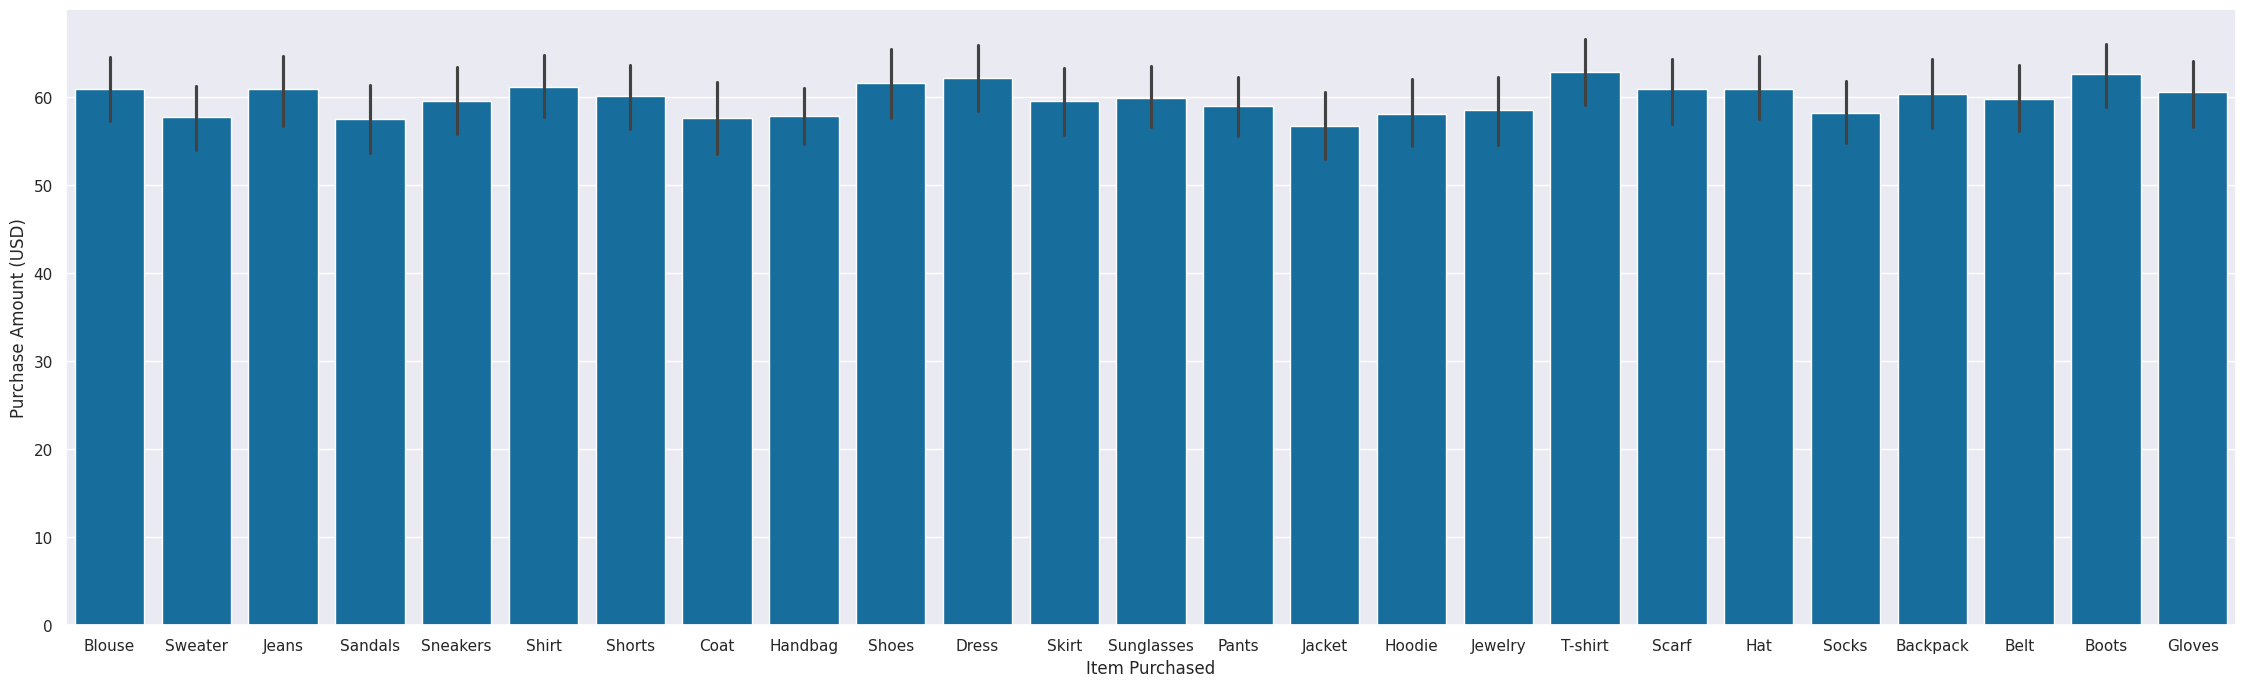

In [ ]:
#checking item distribution in bar plot
plt.figure(figsize=(28,8))
sns.barplot(x='Item Purchased',y='Purchase Amount (USD)',data=df)

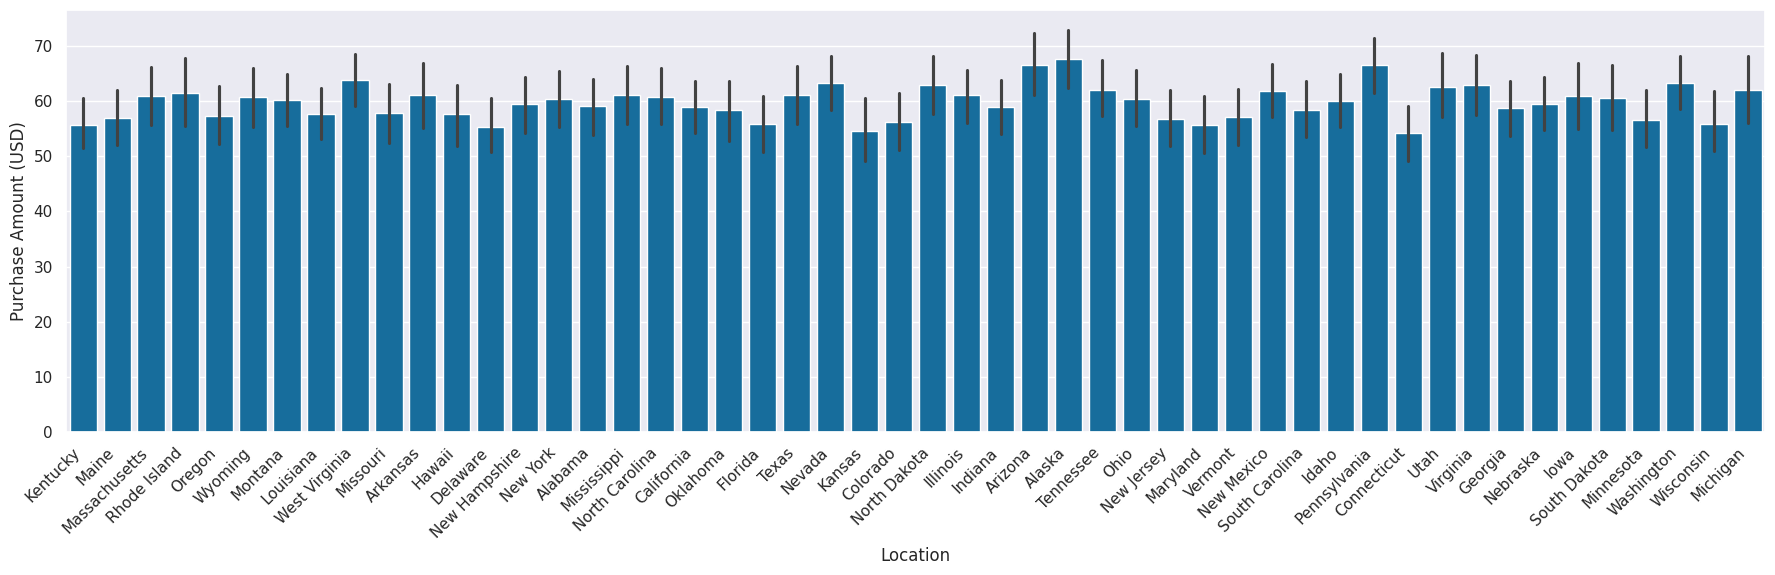

In [ ]:
#check the purchase power across locations (Bivariate analysis)
plt.figure(figsize=(18, 6))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=df)
plt.xticks(rotation=45, ha='right') # Rotating X axis
plt.tight_layout() #layout adjustment for overlapping
plt.show()

In [ ]:
df['Previous Purchases'].value_counts()

,count
Previous Purchases,
31,97
21,96
14,92
24,91
3,91
4,91
48,90
47,90
5,87


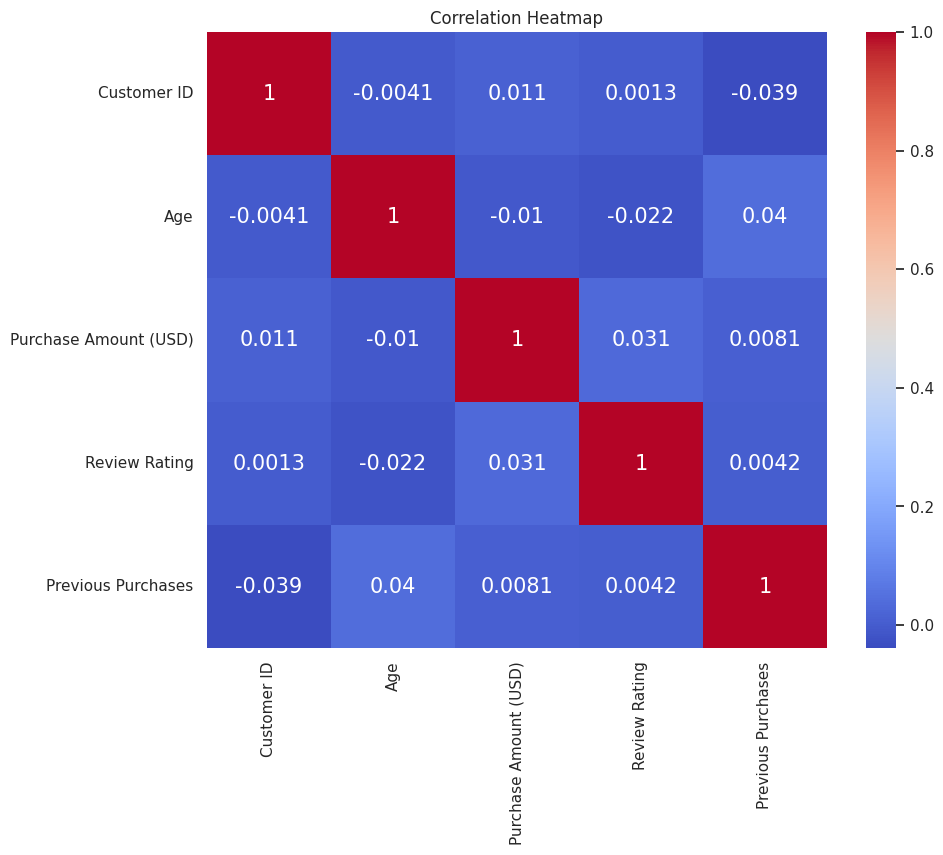

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

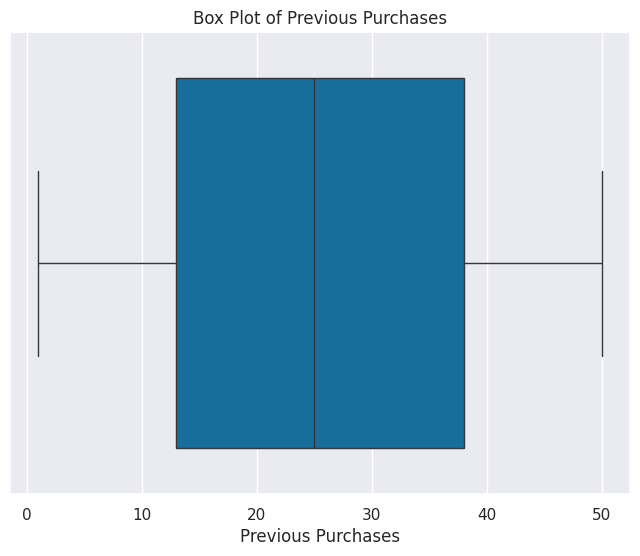

Number of outliers: 0
Outliers:
 Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


In [ ]:
# Box plot for outlier visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Previous Purchases'])
plt.title('Box Plot of Previous Purchases')
plt.show()

# Identify outliers using IQR
Q1 = df['Previous Purchases'].quantile(0.25)
Q3 = df['Previous Purchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Previous Purchases'] < lower_bound) | (df['Previous Purchases'] > upper_bound)]
print("Number of outliers:", len(outliers))
print("Outliers:\n", outliers)

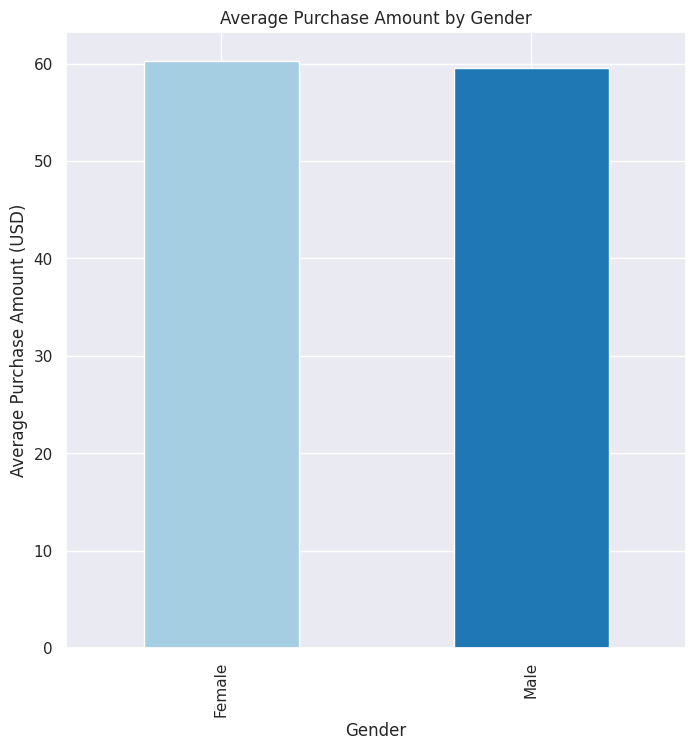

In [ ]:
# Create a bar chart
df.groupby("Gender")["Purchase Amount (USD)"].mean().sort_values(ascending=0).plot(kind="bar", color=plt.cm.Paired.colors)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#trying to convert review rating into stars for better uniformity
df["Stars"] = df["Review Rating"].apply(lambda x: int(x))

<Figure size 1000x500 with 0 Axes>

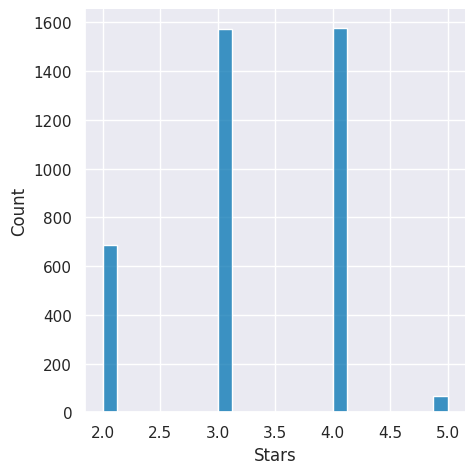

In [ ]:
# check distribution after conversion
plt.figure(figsize=(10,5))
sns.displot(df["Stars"])
plt.show()

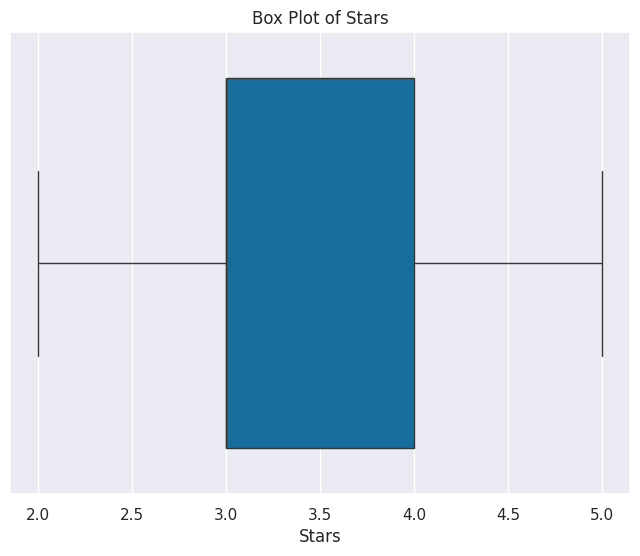

Number of outliers: 0
Outliers:
 Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases, Stars]
Index: []


In [ ]:
# Box plot for outlier visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Stars'])
plt.title('Box Plot of Stars')
plt.show()

# Identify outliers using IQR
Q1 = df['Stars'].quantile(0.25)
Q3 = df['Stars'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Stars'] < lower_bound) | (df['Stars'] > upper_bound)]
print("Number of outliers:", len(outliers))
print("Outliers:\n", outliers)

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Stars
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,3
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,3
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,2


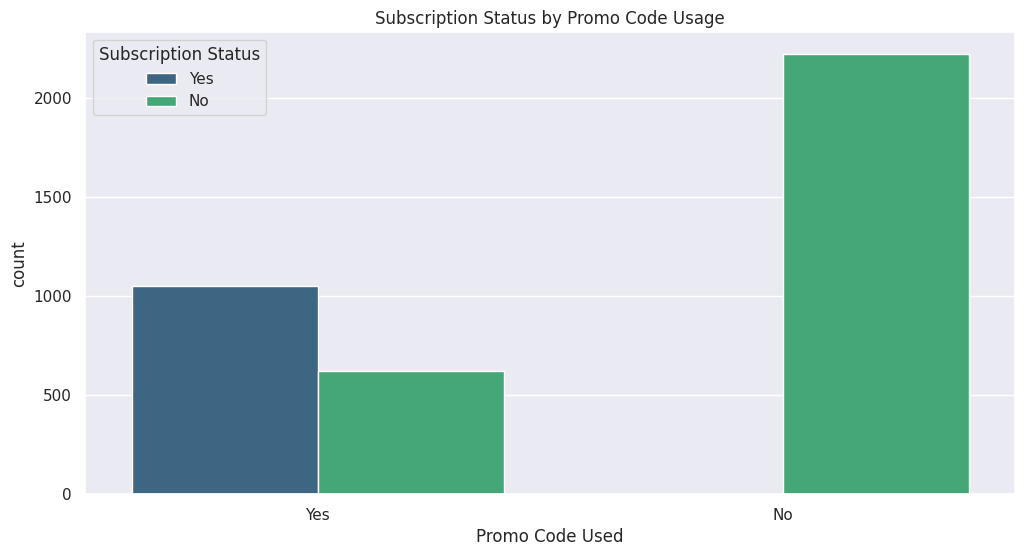

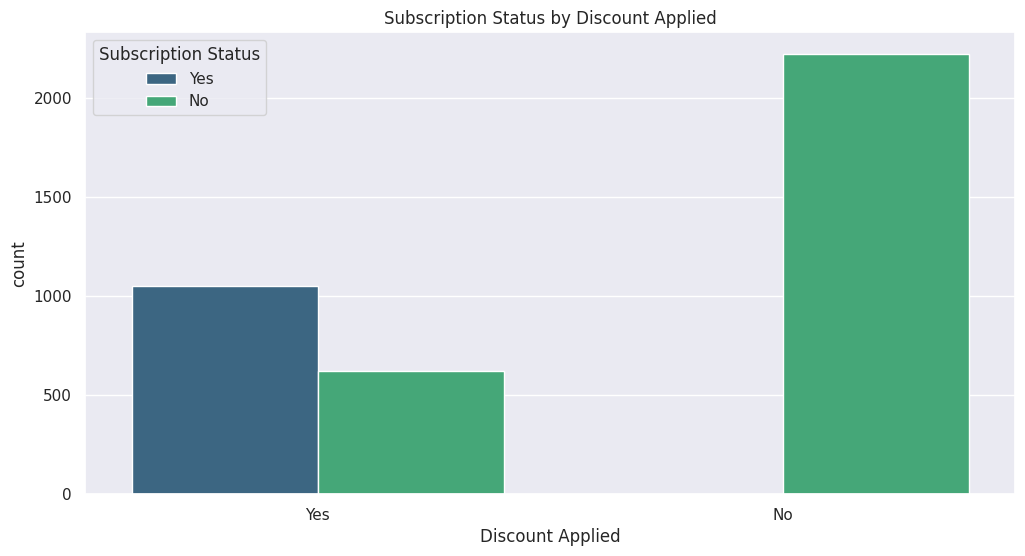

Subscription Status                 No   Yes   All
Promo Code Used Discount Applied                  
No              No                2223     0  2223
Yes             Yes                624  1053  1677
All                               2847  1053  3900
Subscription Status                 No   Yes
Promo Code Used Discount Applied            
No              No                2223     0
Yes             Yes                624  1053


Promo Code Used  Discount Applied  Subscription Status
No               No                No                     100.000000
Yes              Yes               Yes                     62.790698
                                   No                      37.209302
Name: proportion, dtype: float64

In [ ]:
# Analyze the relationship between Promo Code Used, Discount Applied, and Subscription Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Promo Code Used', hue='Subscription Status', data=df, palette='viridis')
plt.title('Subscription Status by Promo Code Usage')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Discount Applied', hue='Subscription Status', data=df, palette='viridis')
plt.title('Subscription Status by Discount Applied')
plt.show()

# Create a cross-tabulation to see the counts of subscriptions for different combinations
promo_discount_subscription = pd.crosstab(index=[df['Promo Code Used'], df['Discount Applied']],
                                         columns=df['Subscription Status'], margins=True)
print(promo_discount_subscription)


#Further analysis using groupby
promo_discount_analysis = df.groupby(['Promo Code Used', 'Discount Applied', 'Subscription Status'])['Subscription Status'].count().unstack(fill_value=0)
print(promo_discount_analysis)


# Calculate subscription rates for each promo code and discount combination
subscription_rates = df.groupby(['Promo Code Used', 'Discount Applied'])['Subscription Status'].value_counts(normalize=True) * 100
subscription_rates

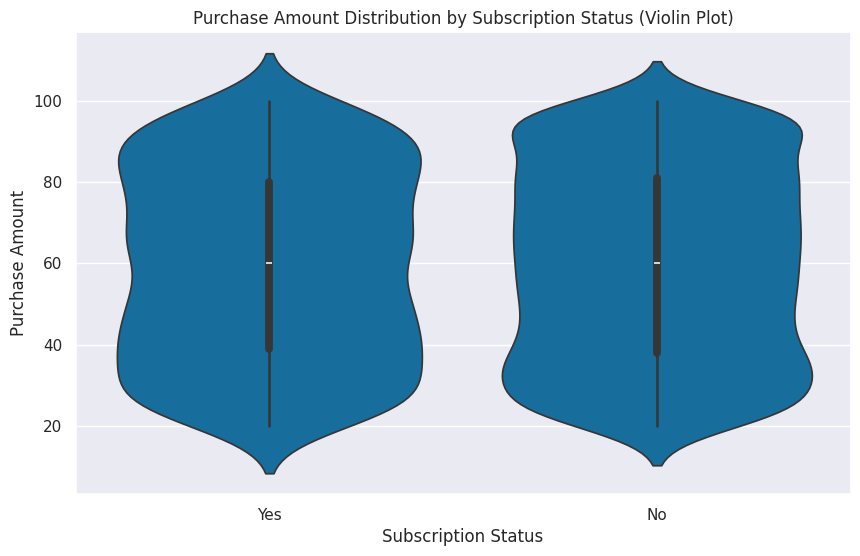

                      count       mean        std   min   25%   50%   75%  \
Subscription Status                                                         
No                   2847.0  59.865121  23.775199  20.0  38.0  60.0  81.0   
Yes                  1053.0  59.491928  23.449914  20.0  39.0  60.0  80.0   

                       max  
Subscription Status         
No                   100.0  
Yes                  100.0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Further analysis using a violin plot (shows distribution density)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Subscription Status (Violin Plot)')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount')
plt.show()


# Calculate descriptive statistics for Purchase Amount by Subscription Status
purchase_amount_stats = df.groupby('Subscription Status')['Purchase Amount (USD)'].describe()
print(purchase_amount_stats)


In [ ]:
# Drop the specified columns
df_balanced = df.drop(['Review Rating', 'Customer ID', 'Promo Code Used', 'Discount Applied'], axis=1)

In [ ]:
df_balanced.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Stars
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,Yes,Express,14,Venmo,Fortnightly,3
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,Yes,Express,2,Cash,Fortnightly,3
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,23,Credit Card,Weekly,3
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,49,PayPal,Weekly,3
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,Yes,Free Shipping,31,PayPal,Annually,2


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3900 non-null   int64 
 1   Gender                  3900 non-null   object
 2   Item Purchased          3900 non-null   object
 3   Category                3900 non-null   object
 4   Purchase Amount (USD)   3900 non-null   int64 
 5   Location                3900 non-null   object
 6   Size                    3900 non-null   object
 7   Color                   3900 non-null   object
 8   Season                  3900 non-null   object
 9   Subscription Status     3900 non-null   object
 10  Shipping Type           3900 non-null   object
 11  Previous Purchases      3900 non-null   int64 
 12  Payment Method          3900 non-null   object
 13  Frequency of Purchases  3900 non-null   object
 14  Stars                   3900 non-null   int64 
dtypes: i

In [ ]:
# Define the age categories and labels
bins = [17, 25, 35, 50, float('inf')]
labels = ['18-25', '26-35', '36-50', '51+']

# Create the new 'Age_Category' column using pd.cut
df_balanced['Age_Category'] = pd.cut(df_balanced['Age'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(df_balanced.head())

   Age Gender Item Purchased  Category  Purchase Amount (USD)       Location  \
0   55   Male         Blouse  Clothing                     53       Kentucky   
1   19   Male        Sweater  Clothing                     64          Maine   
2   50   Male          Jeans  Clothing                     73  Massachusetts   
3   21   Male        Sandals  Footwear                     90   Rhode Island   
4   45   Male         Blouse  Clothing                     49         Oregon   

  Size      Color  Season Subscription Status  Shipping Type  \
0    L       Gray  Winter                 Yes        Express   
1    L     Maroon  Winter                 Yes        Express   
2    S     Maroon  Spring                 Yes  Free Shipping   
3    M     Maroon  Spring                 Yes   Next Day Air   
4    M  Turquoise  Spring                 Yes  Free Shipping   

   Previous Purchases Payment Method Frequency of Purchases  Stars  \
0                  14          Venmo            Fortnightly     

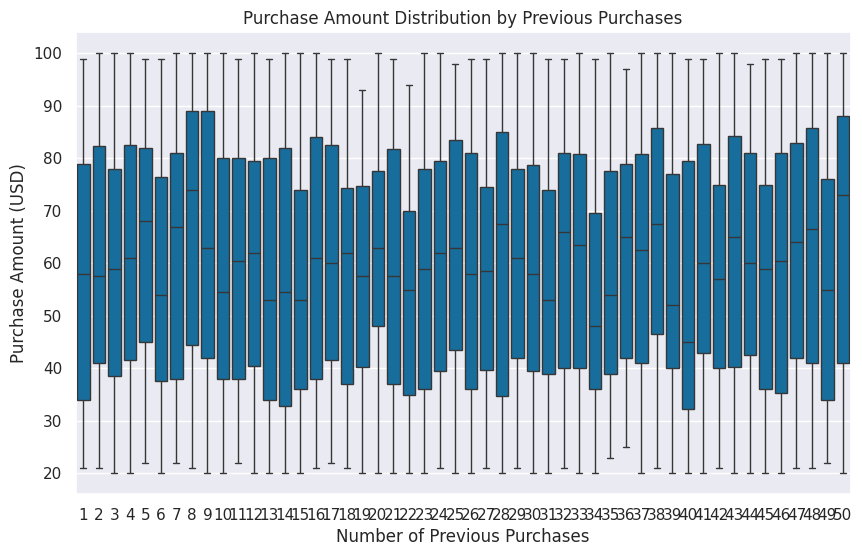

                    count       mean        std   min    25%   50%    75%  \
Previous Purchases                                                          
1                    83.0  58.469880  23.668100  21.0  34.00  58.0  79.00   
2                    72.0  60.333333  23.501873  21.0  41.00  57.5  82.25   
3                    91.0  58.560440  23.524082  20.0  38.50  59.0  78.00   
4                    91.0  61.274725  23.970383  20.0  41.50  61.0  82.50   
5                    87.0  64.252874  22.604393  22.0  45.00  68.0  82.00   
6                    87.0  55.850575  22.896902  20.0  37.50  54.0  76.50   
7                    65.0  61.200000  22.885039  22.0  38.00  67.0  81.00   
8                    67.0  66.671642  24.168216  21.0  44.50  74.0  89.00   
9                    65.0  63.784615  25.674338  20.0  42.00  63.0  89.00   
10                   76.0  58.184211  24.226548  20.0  38.00  54.5  80.00   
11                   82.0  59.500000  25.141206  22.0  38.00  60.5  80.00   

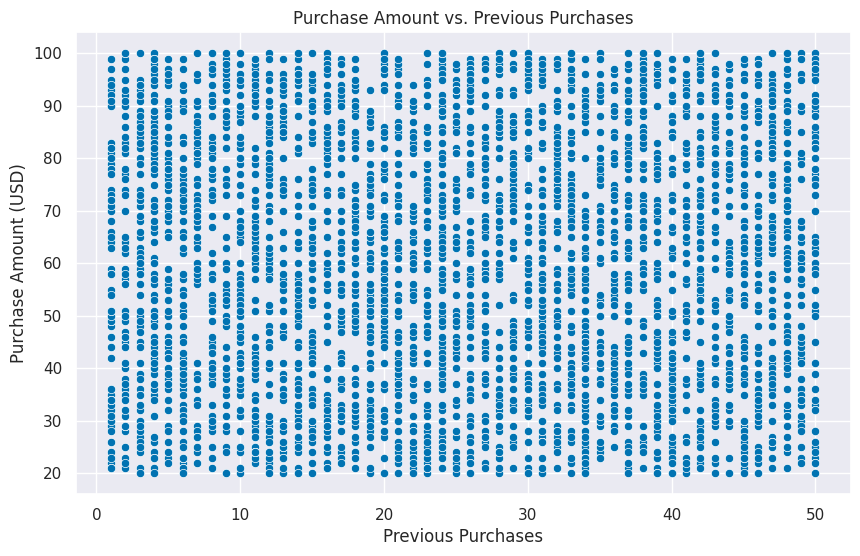

In [ ]:
# Analyze the relationship between Previous Purchases and Purchase Decision (e.g., Purchase Amount)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df_balanced)
plt.title('Purchase Amount Distribution by Previous Purchases')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Calculate descriptive statistics for Purchase Amount by Previous Purchases
purchase_amount_stats_by_previous = df_balanced.groupby('Previous Purchases')['Purchase Amount (USD)'].describe()
print(purchase_amount_stats_by_previous)

# Further analysis:  See if there's a correlation
correlation = df_balanced['Previous Purchases'].corr(df_balanced['Purchase Amount (USD)'])
print(f"\nCorrelation between Previous Purchases and Purchase Amount: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df_balanced)
plt.title('Purchase Amount vs. Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

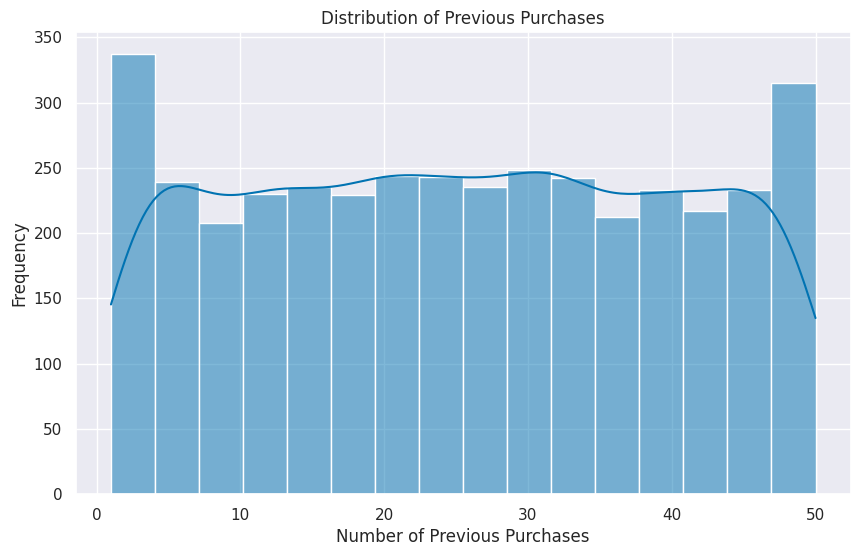

In [ ]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df_balanced['Previous Purchases'], kde=True)
plt.title('Distribution of Previous Purchases')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df_balanced= df_balanced.drop(['Age'], axis=1)

In [ ]:
#encoding the data
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders for each categorical column
le_category = LabelEncoder()
le_size = LabelEncoder()
le_season = LabelEncoder()
le_shipping = LabelEncoder()
le_payment = LabelEncoder()
le_frequency = LabelEncoder()
le_gender = LabelEncoder()
le_subscription = LabelEncoder()
le_item = LabelEncoder()
le_location = LabelEncoder()
le_color = LabelEncoder()

# Fit and transform the categorical columns
df_balanced['Category'] = le_category.fit_transform(df_balanced['Category'])
df_balanced['Size'] = le_size.fit_transform(df_balanced['Size'])
df_balanced['Season'] = le_season.fit_transform(df_balanced['Season'])
df_balanced['Shipping Type'] = le_shipping.fit_transform(df_balanced['Shipping Type'])
df_balanced['Payment Method'] = le_payment.fit_transform(df_balanced['Payment Method'])
df_balanced['Frequency of Purchases'] = le_frequency.fit_transform(df_balanced['Frequency of Purchases'])
df_balanced['Gender'] = le_gender.fit_transform(df_balanced['Gender'])
df_balanced['Subscription Status'] = le_subscription.fit_transform(df_balanced['Subscription Status'])
df_balanced['Item Purchased'] = le_item.fit_transform(df_balanced['Item Purchased'])
df_balanced['Location'] = le_location.fit_transform(df_balanced['Location'])
df_balanced['Color'] = le_color.fit_transform(df_balanced['Color'])

In [ ]:
df_balanced.head()

,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Stars,Age_Category
0,1,2,1,53,16,0,7,3,1,1,14,5,3,3,51+
1,1,23,1,64,18,0,12,3,1,1,2,1,3,3,18-25
2,1,11,1,73,20,2,12,1,1,2,23,2,6,3,36-50
3,1,14,2,90,38,1,12,1,1,3,49,4,6,3,18-25
4,1,2,1,49,36,1,21,1,1,2,31,4,0,2,36-50


In [ ]:
# Create a LabelEncoder object for Age_Category
le_age_category = LabelEncoder()

# Fit and transform the 'Age_Category' column
df_balanced['Age_Category'] = le_age_category.fit_transform(df_balanced['Age_Category'])

df_balanced.head()

,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Stars,Age_Category
0,1,2,1,53,16,0,7,3,1,1,14,5,3,3,3
1,1,23,1,64,18,0,12,3,1,1,2,1,3,3,0
2,1,11,1,73,20,2,12,1,1,2,23,2,6,3,2
3,1,14,2,90,38,1,12,1,1,3,49,4,6,3,0
4,1,2,1,49,36,1,21,1,1,2,31,4,0,2,2


In [ ]:
# Fit and transform the data
X = df_balanced.drop('Purchase Amount (USD)', axis=1)
y = df_balanced['Purchase Amount (USD)']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')

Linear Regression:
  Mean Squared Error: 567.5124809559036
  R-squared: -0.014171477803340826
Random Forest:
  Mean Squared Error: 575.3138111538461
  R-squared: -0.028112821546746325
XGBRegressor:
  Mean Squared Error: 692.0789794921875
  R-squared: -0.236777663230896


In [ ]:
# For Random Forest
feature_importances_rf = models['Random Forest'].feature_importances_
# For XGBRegressor
feature_importances_xgb = models['XGBRegressor'].feature_importances_


In [ ]:
# Print feature importances for RandomForest
for feature_name, importance in zip(X.columns, feature_importances_rf):
    print(f"Random Forest - Feature: {feature_name}, Importance: {importance}")


# Print feature importances for XGBRegressor
for feature_name, importance in zip(X.columns, feature_importances_xgb):
    print(f"XGBRegressor - Feature: {feature_name}, Importance: {importance}")

Random Forest - Feature: Gender, Importance: 0.020868897984490594
Random Forest - Feature: Item Purchased, Importance: 0.11855647814928019
Random Forest - Feature: Category, Importance: 0.03866308726635183
Random Forest - Feature: Location, Importance: 0.14134431783029594
Random Forest - Feature: Size, Importance: 0.046909900548597824
Random Forest - Feature: Color, Importance: 0.12417023216025418
Random Forest - Feature: Season, Importance: 0.04647327497501941
Random Forest - Feature: Subscription Status, Importance: 0.019095582098505315
Random Forest - Feature: Shipping Type, Importance: 0.07038297446011944
Random Forest - Feature: Previous Purchases, Importance: 0.14724137538512982
Random Forest - Feature: Payment Method, Importance: 0.06437478585876247
Random Forest - Feature: Frequency of Purchases, Importance: 0.07137349516478032
Random Forest - Feature: Stars, Importance: 0.04099414488188384
Random Forest - Feature: Age_Category, Importance: 0.049551453236528924
XGBRegressor - F

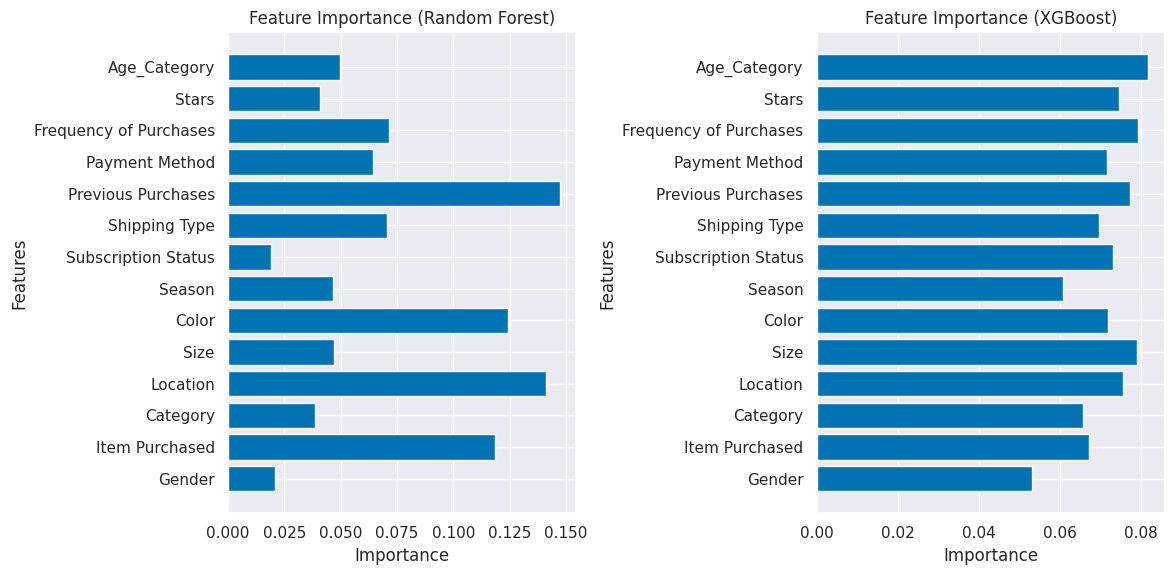

In [ ]:
# Feature Importance Visualization (for Random Forest and XGBoost)

importances_rf = models['Random Forest'].feature_importances_
importances_xgb = models['XGBRegressor'].feature_importances_

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Feature Importance (Random Forest)')
plt.barh(X.columns, importances_rf)
plt.xlabel('Importance')
plt.ylabel('Features')

plt.subplot(1, 2, 2)
plt.title('Feature Importance (XGBoost)')
plt.barh(X.columns, importances_xgb)
plt.xlabel('Importance')
plt.ylabel('Features')

plt.tight_layout()  # Adjust subplot params for a tight layout
plt.show()




#Further Model Improvements suggestions:

#1. More advanced feature engineering
#2. More robust data preprocessing techniques
#3. Other Regression Algorithms
#4. Regularization of Models (L1 or L2)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best score: -575.7669211783856
Tuned Random Forest:
  Mean Squared Error: 564.2780535974945
  R-squared: -0.008391404088662124


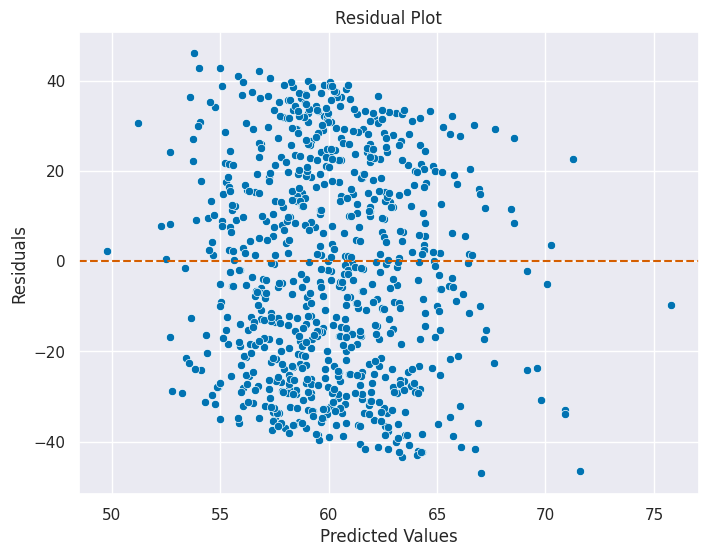

In [ ]:
# Hyperparameter Tuning (Example for Random Forest)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_tuned = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

# Evaluate the tuned Random Forest Model
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f'Tuned Random Forest:')
print(f'  Mean Squared Error: {mse_tuned}')
print(f'  R-squared: {r2_tuned}')

# Residual Analysis

residuals = y_test - y_pred_tuned  # Use predictions from the tuned model

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_tuned, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
